In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


mpl.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",
    "axes.unicode_minus": False,
})

In [2]:
'''All in GeV unless stated otherwise'''

vH = 246.0  # Higgs VEV
mH = 125.10  # Higgs mass

combined_strength = 1.03
error_cs = 0.04

value_at1sigma = combined_strength - error_cs
value_at2sigma = combined_strength - 2 * error_cs


In [3]:
theta_bound = np.arccos(np.sqrt(value_at1sigma))
theta_bound_2sigma = np.arccos(np.sqrt(value_at2sigma))

In [4]:
def product(ms, theta):
    numerator = np.sin(theta) * np.cos(theta) * (ms**2 - mH**2)
    denominator = mH**2 * np.cos(theta)**2 + ms**2 * np.sin(theta)**2
    return numerator / denominator

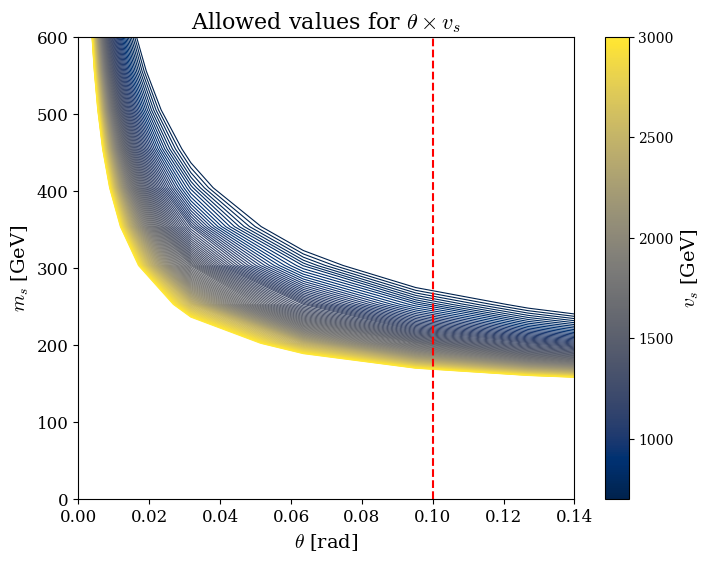

In [7]:
ms_values = np.linspace(0, 5000, 100)
theta_values = np.linspace(0, np.pi, 100)

vs_min, vs_max = 700, 3000


Theta, Ms = np.meshgrid(theta_values, ms_values)
Z = product(Ms, Theta)


fig, ax = plt.subplots(figsize=(8, 6))


cmap = plt.cm.cividis
norm = Normalize(vmin = vs_min, vmax = vs_max)

for vs in np.linspace(vs_min, vs_max, 100):
    level = vH / vs
    color = cmap(norm(vs))
    ax.contour(Theta, Ms, Z, levels=[level], colors=[color], linewidths=0.8)


sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r'$v_s$ [GeV]', fontsize=14)

plt.axvline(theta_bound, 0, 5000, color='red', linestyle='--', label=r'1$\sigma$ bound')
plt.axvline(theta_bound_2sigma, 0, 5000, color='orange', linestyle='--', label=r'2$\sigma$ bound')


ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(r'$\theta$ [rad]', fontsize=14)
ax.set_ylabel(r'$m_s$ [GeV]', fontsize=14)
plt.xlim(0, 0.14)
#plt.yscale('log')
plt.ylim(0, 600)
ax.set_title(r'Allowed values for $\theta \times v_s$', fontsize=16)
plt.savefig('theta_ms.pdf', format='pdf', bbox_inches='tight')